<a href="https://colab.research.google.com/github/gaganmathur99/Apple_Counting_In_Orchard/blob/main/Number_of_Apple_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Apple Classification Model for MinneApple Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Download Dataset

In [ ]:
!wget https://conservancy.umn.edu/bitstream/handle/11299/206575/counting.tar.gz?sequence=1&isAllowed=y

--2021-12-31 16:32:15--  https://conservancy.umn.edu/bitstream/handle/11299/206575/counting.tar.gz?sequence=1
Resolving conservancy.umn.edu (conservancy.umn.edu)... 128.101.122.105
Connecting to conservancy.umn.edu (conservancy.umn.edu)|128.101.122.105|:443... connected.
HTTP request sent, awaiting response... 200 200
Length: 1024341194 (977M) [application/gzip]
Saving to: ‘counting.tar.gz?sequence=1’

counting.tar.gz?seq 100%[===================>] 976.89M  44.2MB/s    in 23s     

2021-12-31 16:32:38 (42.6 MB/s) - ‘counting.tar.gz?sequence=1’ saved [1024341194/1024341194]



In [ ]:
!tar --gunzip --extract --verbose --file=counting.tar.gz?sequence=1

Streaming output truncated to the last 5000 lines.
counting/train/images/images_52239.png
counting/train/images/images_23939.png
counting/train/images/images_17113.png
counting/test/images/testset2_781cluster_13_count0.png
counting/train/images/images_45850.png
counting/train/images/images_49938.png
counting/train/images/images_24482.png
counting/train/images/images_43591.png
counting/test/images/testset3_301cluster_21_count0.png
counting/train/images/images_47679.png
counting/train/images/images_43246.png
counting/train/images/images_10513.png
counting/train/images/images_36512.png
counting/train/images/images_19577.png
counting/train/images/images_15144.png
counting/train/images/images_62990.png
counting/train/images/images_62645.png
counting/train/images/images_08410.png
counting/train/images/images_41277.png
counting/train/images/images_10803.png
counting/train/images/images_30110.png
counting/train/images/images_55911.png
counting/train/images/images_38976.png
counting/train/image

In [ ]:
Importing Important Libraries

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
import keras
from keras.models import Model
from keras.layers import Conv2D, MaxPooling2D, Input, Conv2DTranspose, Concatenate, BatchNormalization, UpSampling2D
from keras.layers import  Dropout, Activation
from tensorflow.keras.optimizers import Adam, SGD
from keras.layers.advanced_activations import LeakyReLU
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from keras import backend as K
from tensorflow.keras.utils import plot_model
import tensorflow as tf
import glob
import random
import cv2
from random import shuffle
import numpy as np
import torch
from sklearn.utils import shuffle

In [ ]:
#Change to resize original image to size accordingly
img_width = 65
img_height = 65
img_channel = 3
num_class=7

In [ ]:
src_path_train = "/content/counting/train/images"
src_path_valid = "/content/counting/val/images"
src_path_test = "/content/counting/test/images"


Reading Images and Ground Truth from the .TXT file

In [ ]:
train_df = pd.read_csv(('/content/counting/train/train_ground_truth.txt'))
# test_df = pd.read_csv('data/test_data.csv')
train_df['Image'] = train_df['Image'].astype(str)
train_df['count'] = train_df['count'].astype(str)
train_df=shuffle(train_df)
train_df.head()
# print(len(train_df))

,Image,count
26804,images_26804.png,2
19962,images_19962.png,2
2552,images_02552.png,0
2087,images_02087.png,0
27185,images_27185.png,2


Generating Image Tensor 

In [ ]:
X=[]
Y_label=[]

In [ ]:
for idx in range(len(train_df)):
  img_path = os.path.join(src_path_train,train_df["Image"][idx])
  img = cv2.imread(img_path, cv2.IMREAD_COLOR)      
  img = cv2.resize(img, (img_width,img_height))
  X.append(img)

  label=int(train_df["count"][idx])
  Y_loc = np.zeros(num_class)
  Y_loc[label]=1
  Y_label.append(Y_loc)


In [ ]:
X = np.array(X)

Repeating Same with Validation dataset

In [ ]:
val_df = pd.read_csv(('/content/counting/val/val_ground_truth.txt'))
# test_df = pd.read_csv('data/test_data.csv')
val_df['Image'] = val_df['Image'].astype(str)
val_df['count'] = val_df['count'].astype(str)
val_df.head()
# print(len(val_df))

,Image,count
0,images_00000.png,0
1,images_00001.png,0
2,images_00002.png,0
3,images_00003.png,0
4,images_00004.png,0


In [ ]:
X_val=[]
Y_val_label=[]
for idx in range(len(val_df)):
  img_path = os.path.join(src_path_train,val_df["Image"][idx])
  img = cv2.imread(img_path, cv2.IMREAD_COLOR)      
  img = cv2.resize(img, (img_width,img_height))
  X_val.append(img)

  label=int(val_df["count"][idx])
  Y_loc = np.zeros(num_class)
  Y_loc[label]=1
  Y_val_label.append(Y_loc)


In [ ]:
#Converting Into munpy array
X_val = np.array(X) 

In [ ]:
x_train, y_train, x_test, y_test = X, Y_label, X_val, Y_val_label

#Defining a CNN for Classification

In [ ]:
import tensorflow as tf


inputs = tf.keras.layers.Input((img_width,img_height,img_channel))
s = tf.keras.layers.Lambda(lambda x: x/255)(inputs) #Normalising and converting image into floating point

#Contracting Path
c1 = tf.keras.layers.Conv2D(16,(3,3), activation="relu", kernel_initializer="he_normal", padding="same")(s)
c1 = tf.keras.layers.Dropout(0.1)(c1)
p1 = tf.keras.layers.MaxPooling2D((2,2))(c1)

c2 = tf.keras.layers.Conv2D(32,(3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p1)
c2 = tf.keras.layers.Dropout(0.1)(c2)
p2 = tf.keras.layers.MaxPooling2D((2,2))(c2)

c3 = tf.keras.layers.Conv2D(64,(3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p2)
c3 = tf.keras.layers.Dropout(0.1)(c3)
p3 = tf.keras.layers.MaxPooling2D((2,2))(c3)

f1 = tf.keras.layers.Flatten()(p3)

d1 = tf.keras.layers.Dense(128,activation="relu")(f1)

output = tf.keras.layers.Dense(7,activation="softmax")(d1)


model = tf.keras.Model(inputs=[inputs],outputs=[output])
model.compile(optimizer='adam',
              loss="categorical_crossentropy",
              metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 65, 65, 3)]       0         
                                                                 
 lambda (Lambda)             (None, 65, 65, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 65, 65, 16)        448       
                                                                 
 dropout (Dropout)           (None, 65, 65, 16)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                             

In [ ]:
checkpointer = tf.keras.callbacks.ModelCheckpoint("Apple_counting.h5", verbose=1, save_best_only=True)

callbacks = [tf.keras.callbacks.TensorBoard(log_dir="logs")] #tf.keras.callbacks.EarlyStopping(patience=5, monitor='val_loss'),

In [ ]:
X = tf.stack(X)
Y_label = tf.stack(Y_label)

In [ ]:
results = model.fit(X, Y_label, validation_split = 0.2, batch_size=32, epochs=10, callbacks=callbacks, shuffle=True )

Epoch 1/10
1615/1615 [==============================] - 457s 282ms/step - loss: 0.8926 - accuracy: 0.6484 - val_loss: 10.6361 - val_accuracy: 0.1069
Epoch 2/10
1615/1615 [==============================] - 445s 276ms/step - loss: 0.5146 - accuracy: 0.8103 - val_loss: 12.2868 - val_accuracy: 0.2523
Epoch 3/10
1615/1615 [==============================] - 459s 284ms/step - loss: 0.3343 - accuracy: 0.8784 - val_loss: 14.0263 - val_accuracy: 0.2643
Epoch 4/10
1615/1615 [==============================] - 450s 279ms/step - loss: 0.2355 - accuracy: 0.9162 - val_loss: 20.0225 - val_accuracy: 0.2597
Epoch 5/10
1615/1615 [==============================] - 461s 286ms/step - loss: 0.1792 - accuracy: 0.9359 - val_loss: 20.5184 - val_accuracy: 0.2622
Epoch 6/10
1615/1615 [==============================] - 457s 283ms/step - loss: 0.1386 - accuracy: 0.9521 - val_loss: 21.7002 - val_accuracy: 0.2709
Epoch 7/10
1615/1615 [==============================] - 472s 292ms/step - loss: 0.1169 - accuracy: 0.9585 

Saving or Importing Model for Future Use

In [ ]:
!mkdir -p saved_model
model.save('/content/gdrive/MyDrive/Colab Notebooks/ML Tutorial/saved_model/Apple_counting')

INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/Colab Notebooks/ML Tutorial/saved_model/Apple_counting/assets


In [ ]:
new_model = tf.keras.models.load_model('/content/gdrive/MyDrive/Colab Notebooks/ML Tutorial/saved_model/Apple_counting')

# Check its architecture
new_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 65, 65, 3)]       0         
                                                                 
 lambda (Lambda)             (None, 65, 65, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 65, 65, 16)        448       
                                                                 
 dropout (Dropout)           (None, 65, 65, 16)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                             

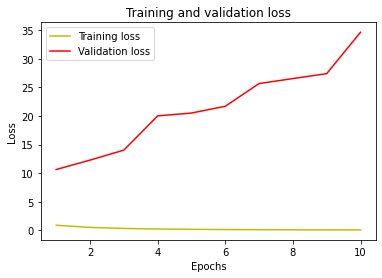

In [ ]:
loss = results.history['loss']
val_loss = results.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

images_01240.png


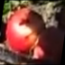

In [ ]:
from google.colab.patches import cv2_imshow

# X = tf.stack(X)
# Y_label = tf.stack(Y_label)
X_test=[]
ix = random.randint(0,len(val_df))
img_path = os.path.join(src_path_valid,val_df["Image"][ix])
print(val_df["Image"][ix])
img = cv2.imread(img_path, cv2.IMREAD_COLOR)      
img = cv2.resize(img, (img_width,img_height))
X_test.append(img)
X_test = np.array(X_test)
cv2_imshow(img)
X_test = tf.stack(X_test)

label=int(val_df["count"][ix])
Y_test = np.zeros(num_class)
Y_test[label]=1


# Results Visualization

In [ ]:
preds_test = model.predict(X_test)
plt.show()
print(np.argmax(Y_test))
print(np.argmax(preds_test))

2
2


In [ ]:
preds_test = new_model.predict(X_test)
plt.show()
print(np.argmax(Y_test))
print(np.argmax(preds_test))

2
2
